# Heart Disease Predicting Model

Using machine learning concepts to classify whether someone have deart disease based on their medical attributes.

We will be using following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## Problem Definition
In a statement,
> Given clinical parameters about a patien, can we predict whether or not they have heart disease?

## Data
From https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data?resource=download&select=heart_disease_uci.csv

## Evaluation
95% accuracy required to considered this project usefull

## Features

- id (Unique id for each patient)
- age (Age of the patient in years)
- origin (place of study)
- sex (Male/Female)
- cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
- trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
- chol (serum cholesterol in mg/dl)
- fbs (if fasting blood sugar > 120 mg/dl)
- restecg (resting electrocardiographic results)
- Values: [normal, stt abnormality, lv hypertrophy]
- thalach: maximum heart rate achieved
- exang: exercise-induced angina (True/ False)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by fluoroscopy
- thal: [normal; fixed defect; reversible defect]
- num: the predicted attribute

## Preparing the data

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Loading the data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# EDA (Exploratory data analysis)

df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot: >

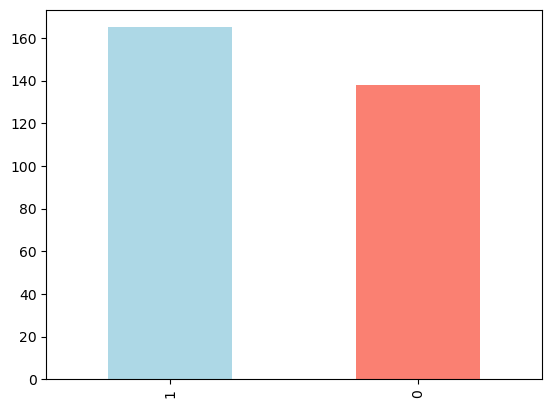

In [4]:
df["target"].value_counts().plot(kind="bar",color=["lightblue","salmon"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:

# a cross tab between target and sex 
# pd.crosstab(df.target,df.sex)


<AxesSubplot: xlabel='target'>

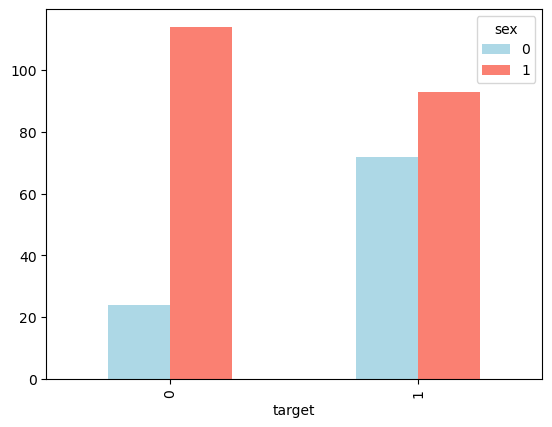

In [9]:
pd.crosstab(df.target,df.sex).plot(kind='bar',color=["lightblue",'salmon'])

## Relation between HeartRate vs HeartDiseases

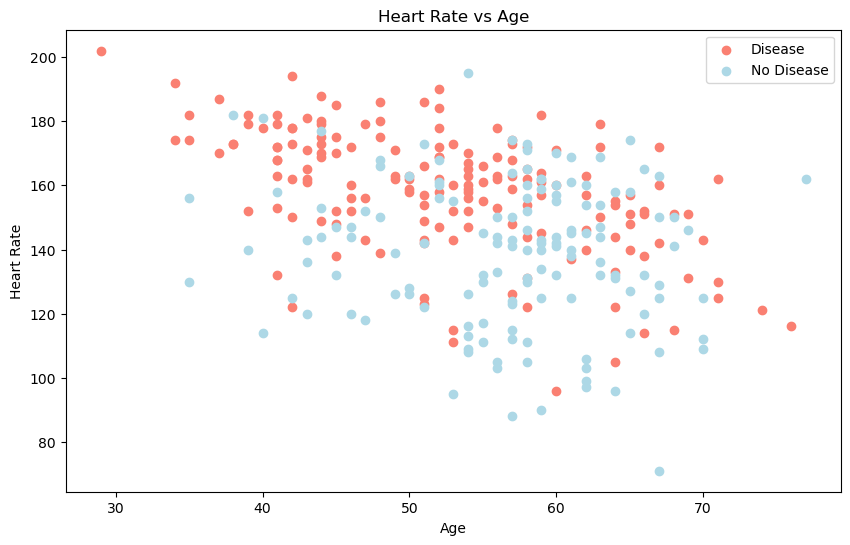

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color=["salmon"])
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color=["lightblue"])
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.title("Heart Rate vs Age")
plt.legend(["Disease","No Disease"])

## Correlation Matrix

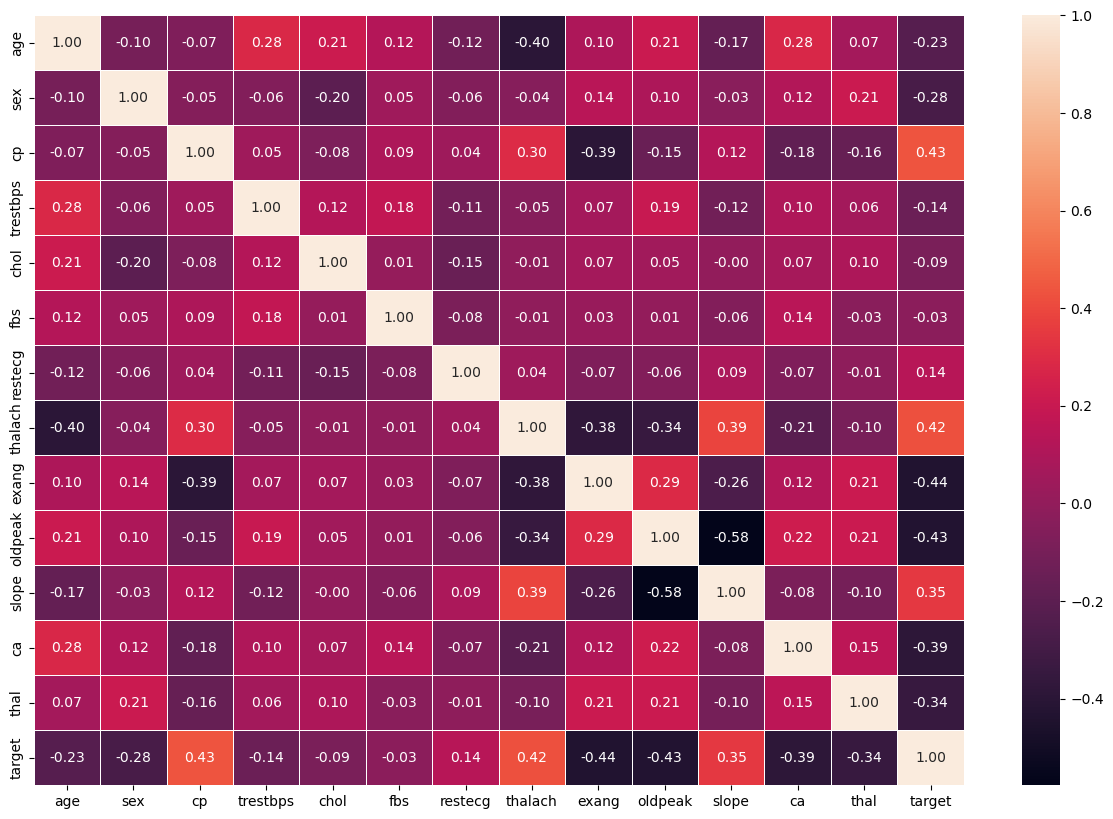

In [11]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f")

In [12]:
x = df.drop("target",axis = 1)
y = df["target"]

In [13]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [14]:
model = {"LogisticRegression": LogisticRegression(),"KNN": KNeighborsClassifier(),"RandomForest": RandomForestClassifier()}

In [15]:
def fitandscore(models,xtrain,ytrain,xtest,ytest):
    """
    Fits and evaluates given machine
    """
    np.random.seed(42)
    model_scores = {}
    for name,model in models.items():
        model.fit(xtrain,ytrain)
        model_scores[name] = model.score(xtest,ytest)
    
    return model_scores

In [16]:
model_scores = fitandscore(model,xtrain,ytrain,xtest,ytest)
model_scores

E:\AI ML\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8360655737704918,
 'KNN': 0.6885245901639344,
 'RandomForest': 0.8032786885245902}

<AxesSubplot: >

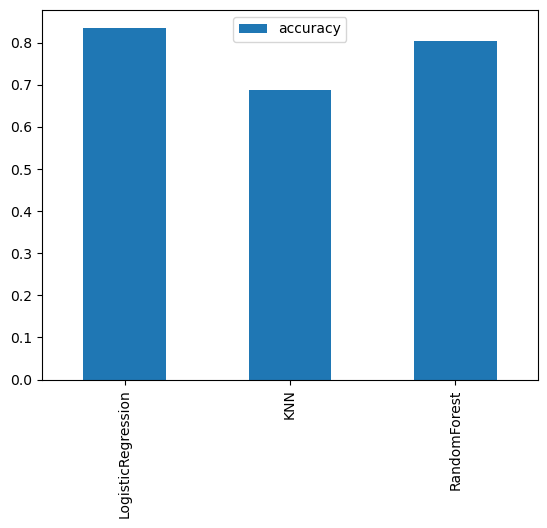

In [17]:
model_compare = pd.DataFrame(model_scores,index = ["accuracy"])
model_compare.T.plot.bar()

## HyperTuning

In [22]:
trainScores = []
testScore =[]

kn = KNeighborsClassifier()
neighbors = range(1,21)

for i in neighbors:
    kn.set_params(n_neighbors=i)
    kn.fit(xtrain,ytrain)
    trainScores.append(kn.score(xtrain,ytrain))
    testScore.append(kn.score(xtest,ytest))

trainScores, testScore

([1.0,
  0.8016528925619835,
  0.756198347107438,
  0.78099173553719,
  0.7520661157024794,
  0.7603305785123967,
  0.7355371900826446,
  0.7396694214876033,
  0.6942148760330579,
  0.6900826446280992,
  0.6983471074380165,
  0.6983471074380165,
  0.6983471074380165,
  0.6900826446280992,
  0.7148760330578512,
  0.6942148760330579,
  0.6942148760330579,
  0.6983471074380165,
  0.7107438016528925,
  0.7107438016528925],
 [0.6065573770491803,
  0.5245901639344263,
  0.6721311475409836,
  0.6229508196721312,
  0.6885245901639344,
  0.6557377049180327,
  0.639344262295082,
  0.6885245901639344,
  0.6721311475409836,
  0.6557377049180327,
  0.6721311475409836,
  0.6721311475409836,
  0.7049180327868853,
  0.7213114754098361,
  0.6885245901639344,
  0.6557377049180327,
  0.6721311475409836,
  0.6885245901639344,
  0.7213114754098361,
  0.7213114754098361])

Maximum score is 72.13%


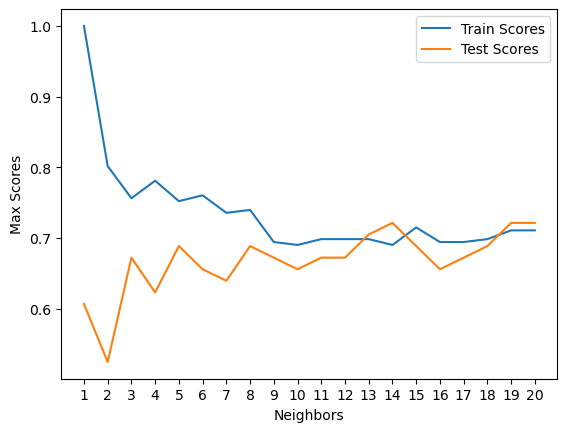

In [34]:
plt.plot(neighbors,trainScores,label="Train Scores")
plt.plot(neighbors,testScore,label="Test Scores")
plt.legend(["Train Scores","Test Scores"])
plt.xticks(range(1,21,1))
plt.xlabel("Neighbors")
plt.ylabel("Max Scores");
print(f"Maximum score is {max(testScore)*100:.2f}%")

## With RandomSearchCV

In [46]:
logRegGrid = {"C": np.logspace(-4,4,20),
             "solver": ["liblinear"]}

rfGrid = {"n_estimators": np.arange(10,1000,50),
         "max_depth": [None,3,5,10],
         "min_samples_split": np.arange(2,20,2),
         "min_samples_leaf": np.arange(1,20,2)}

In [39]:
rsLogReg = RandomizedSearchCV(LogisticRegression(),param_distributions=logRegGrid,cv=5,n_iter=20,verbose=True)
rsLogReg.fit(xtrain,ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [41]:
rsLogReg.best_params_

{'solver': 'liblinear', 'C': 29.763514416313132}

In [42]:
rsLogReg.score(xtest,ytest)

0.819672131147541

In [47]:
rsRfReg = RandomizedSearchCV(RandomForestClassifier(),param_distributions=rfGrid,cv=5,n_iter=20,verbose=True)
rsRfReg.fit(xtrain,ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [48]:
rsRfReg.best_params_

{'n_estimators': 160,
 'min_samples_split': 16,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [49]:
rsRfReg.score(xtest,ytest)

0.7868852459016393

In [51]:
ypreds = rsLogReg.predict(xtest)
ypreds

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [52]:
ytest

154    1
218    0
124    1
191    0
93     1
      ..
152    1
216    0
102    1
242    0
145    1
Name: target, Length: 61, dtype: int64

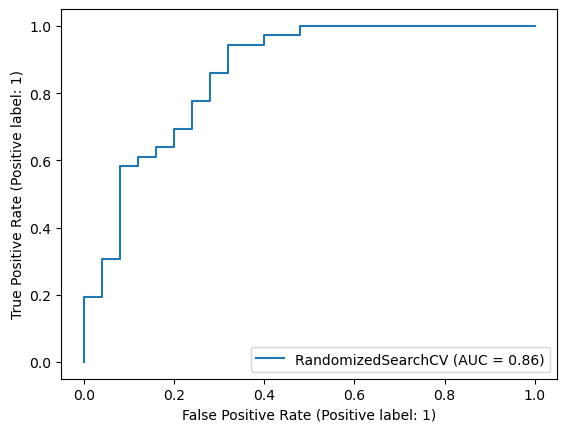

In [54]:
RocCurveDisplay.from_estimator(rsLogReg,xtest,ytest)

In [55]:
print(confusion_matrix(ytest,ypreds))

[[17  8]
 [ 3 33]]


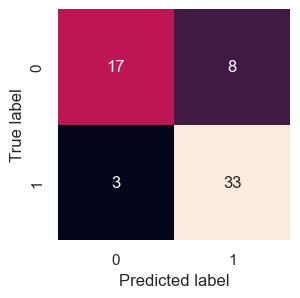

In [59]:
sns.set(font_scale=1)
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(ytest, ypreds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(ytest, ypreds)

In [60]:
print(classification_report(ytest,ypreds))

              precision    recall  f1-score   support

           0       0.85      0.68      0.76        25
           1       0.80      0.92      0.86        36

    accuracy                           0.82        61
   macro avg       0.83      0.80      0.81        61
weighted avg       0.82      0.82      0.82        61



In [61]:
rsLogReg.best_params_

{'solver': 'liblinear', 'C': 29.763514416313132}

In [62]:
clf = LogisticRegression(solver='liblinear',C=29.763514416313132)

## Cross Validating

In [74]:
cvAcc = cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cvAcc = cvAcc.mean()

In [75]:
cvPre = cross_val_score(clf,x,y,cv=5,scoring="precision")
cvPre = cvPre.mean()

In [76]:
cvF1 = cross_val_score(clf,x,y,cv=5,scoring="f1")
cvF1 = cvF1.mean()

In [77]:
cvRecall = cross_val_score(clf,x,y,cv=5,scoring="recall")
cvRecall = cvRecall.mean()

<AxesSubplot: >

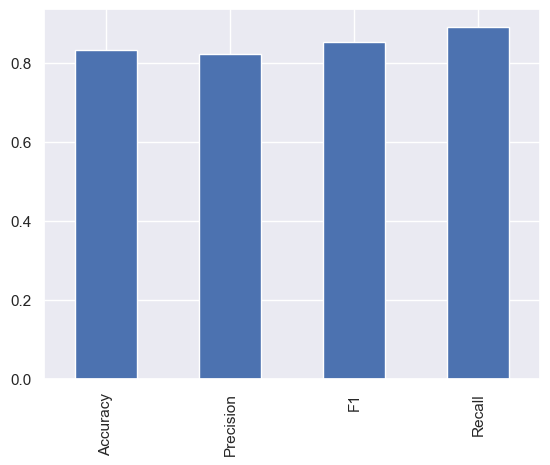

In [78]:
cvMetrics = pd.DataFrame({"Accuracy":cvAcc,"Precision":cvPre,"F1":cvF1,"Recall":cvRecall},index=[0])
cvMetrics.T.plot.bar(legend=False)

## Feature Importance

In [80]:
clf.fit(xtrain,ytrain)
clf.coef_

array([[-0.01277865, -1.6001926 ,  0.8935555 , -0.02713264, -0.0016081 ,
        -0.11665292,  0.8083831 ,  0.02302776, -1.14367576, -0.72897365,
         0.09763756, -0.73329176, -0.69847687]])

In [83]:
featureDict = dict(zip(df.columns,list(clf.coef_[0])))
featureDict

{'age': -0.01277864822532052,
 'sex': -1.6001925968676511,
 'cp': 0.8935555023855549,
 'trestbps': -0.027132641341207728,
 'chol': -0.0016080955900699553,
 'fbs': -0.11665292198739759,
 'restecg': 0.8083831035903191,
 'thalach': 0.023027761333329618,
 'exang': -1.1436757587511688,
 'oldpeak': -0.7289736492285048,
 'slope': 0.09763756082520093,
 'ca': -0.7332917585831578,
 'thal': -0.6984768700288774}

<AxesSubplot: >

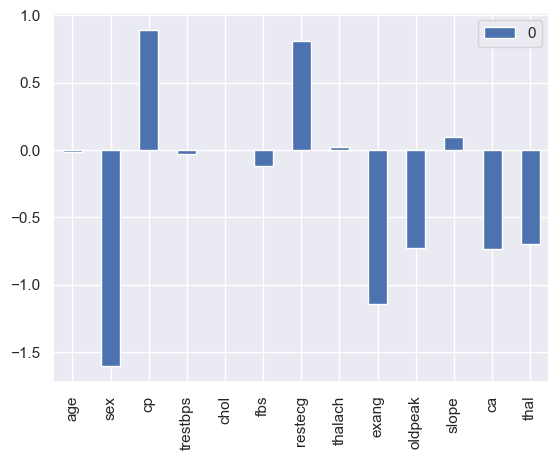

In [86]:
featureDict = pd.DataFrame(featureDict,index=[0])
featureDict.T.plot.bar()